Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.94 loaded



     views             comments       duration   
 Min.   :       0   Min.   :   0   Min.   :  60  
 1st Qu.:  882069   1st Qu.:  38   1st Qu.: 393  
 Median : 1375508   Median :  89   Median : 738  
 Mean   : 2148006   Mean   : 162   Mean   : 724  
 3rd Qu.: 2133110   3rd Qu.: 188   3rd Qu.: 974  
 Max.   :65051954   Max.   :6449   Max.   :3922  
                    NA's   :655                  

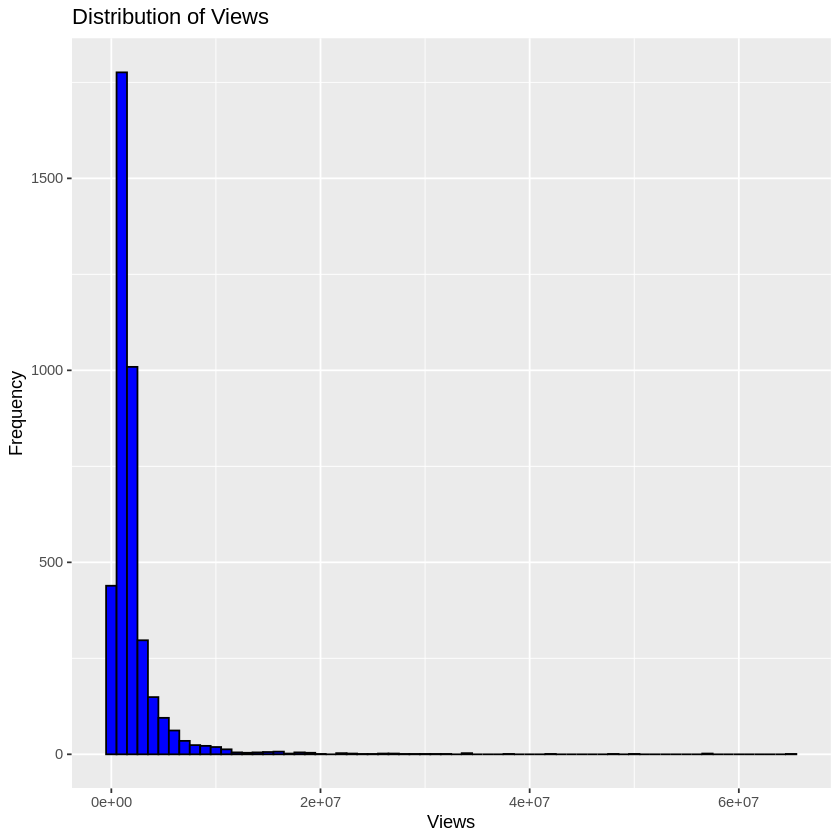

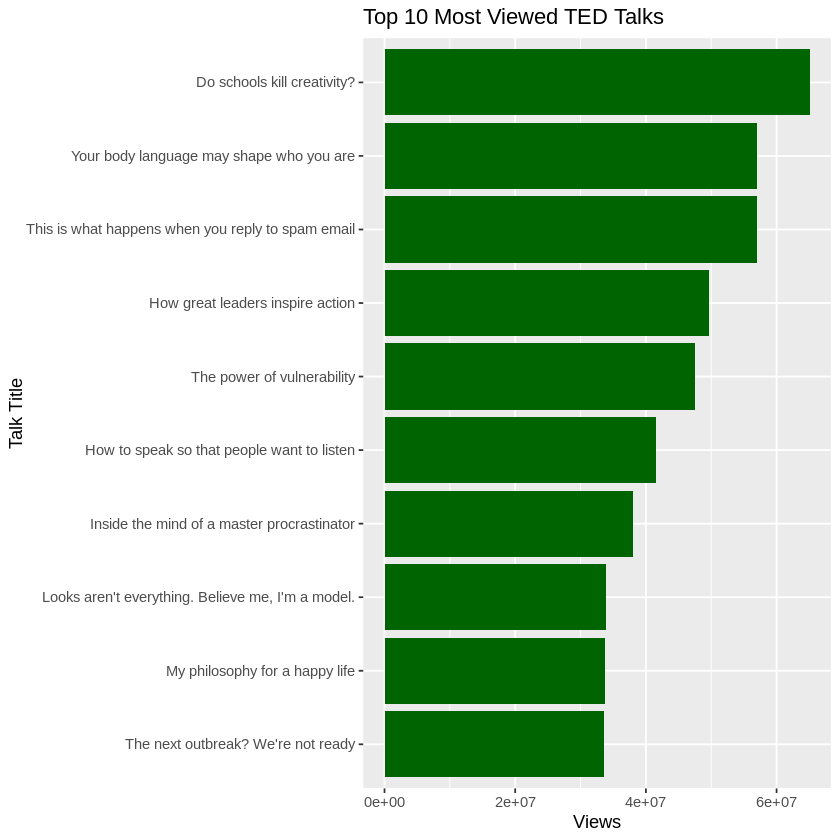

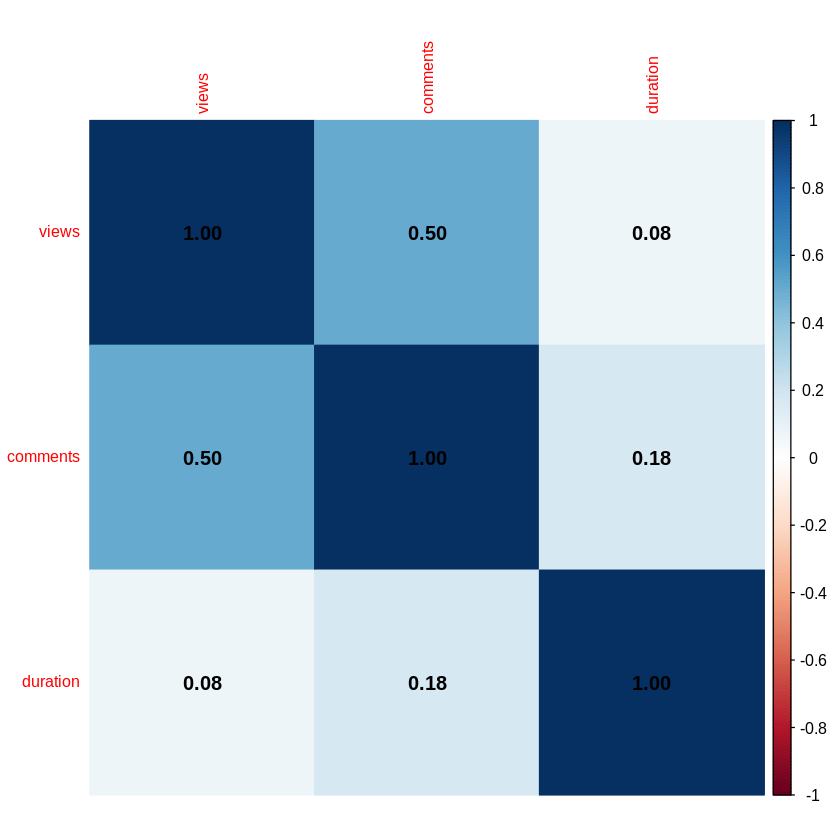


Call:
lm(formula = views ~ duration, data = ted_talks)

Residuals:
     Min       1Q   Median       3Q      Max 
-3900407 -1265921  -749031      944 62594846 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1639371.0   121701.2  13.470  < 2e-16 ***
duration        702.5      150.4   4.672 3.08e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3442000 on 4003 degrees of freedom
Multiple R-squared:  0.005423,	Adjusted R-squared:  0.005175 
F-statistic: 21.83 on 1 and 4003 DF,  p-value: 3.081e-06


`geom_smooth()` using formula = 'y ~ x'


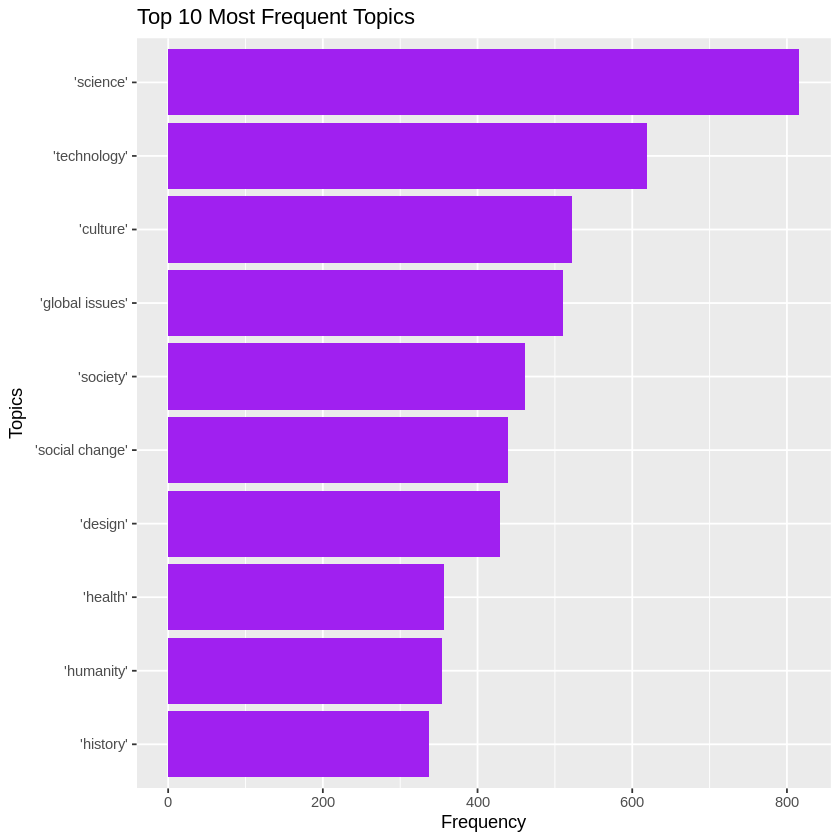


Call:
lm(formula = views ~ comments, data = ted_talks)

Residuals:
      Min        1Q    Median        3Q       Max 
-37685324   -952288   -332774    299557  54123362 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1121396.2    61573.9   18.21   <2e-16 ***
comments       6567.3      196.2   33.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3052000 on 3348 degrees of freedom
  (655 observations deleted due to missingness)
Multiple R-squared:  0.2507,	Adjusted R-squared:  0.2505 
F-statistic:  1120 on 1 and 3348 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 655 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 655 rows containing missing values or values outside the scale range
(`geom_point()`).”


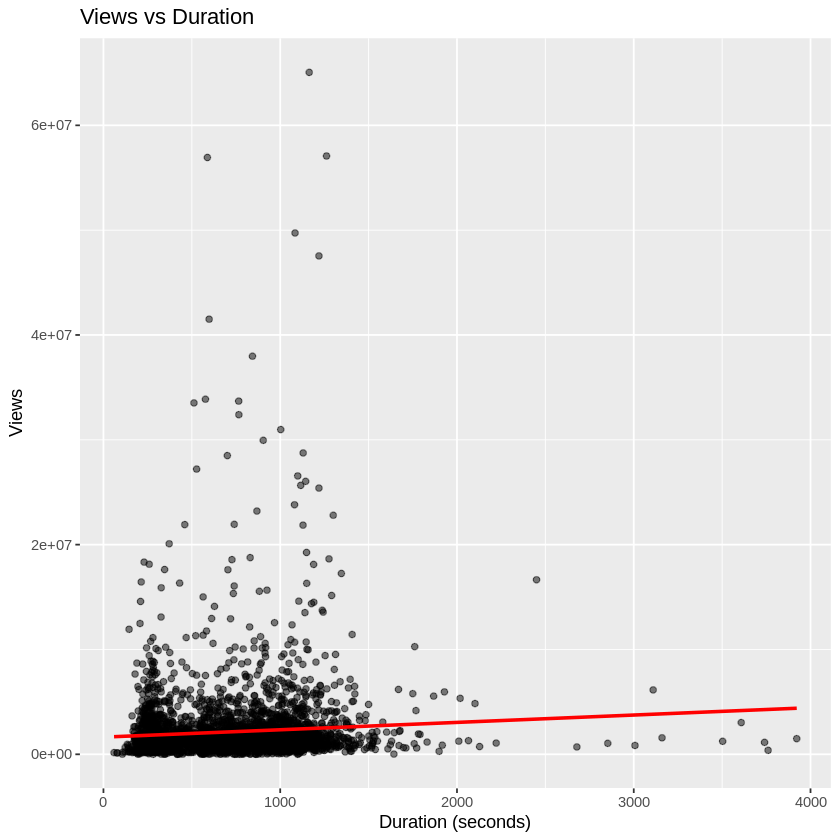

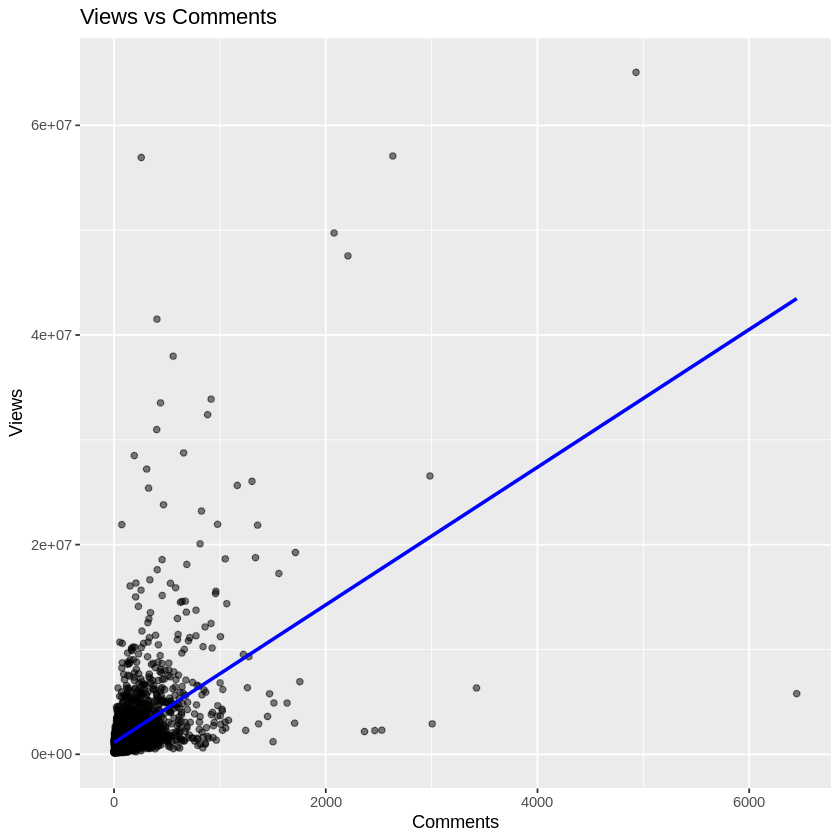

In [2]:
# Install the corrplot package
install.packages("corrplot")

# Load necessary libraries
library(ggplot2)
library(dplyr)
library(corrplot)

# Load dataset
ted_talks <- read.csv("ted_talks.csv")

# 1. Summary Statistics
summary(ted_talks[c("views", "comments", "duration")])

# 2. Distribution of Views
ggplot(ted_talks, aes(x = views)) +
  geom_histogram(binwidth = 1000000, fill = "blue", color = "black") +
  labs(title = "Distribution of Views", x = "Views", y = "Frequency")

# 3. Top 10 Most Viewed Talks
top_10_talks <- ted_talks %>%
  arrange(desc(views)) %>%
  head(10)

ggplot(top_10_talks, aes(x = reorder(title, views), y = views)) +
  geom_bar(stat = "identity", fill = "darkgreen") +
  coord_flip() +
  labs(title = "Top 10 Most Viewed TED Talks", x = "Talk Title", y = "Views")

# 4. Correlation Matrix of Numerical Variables
cor_matrix <- cor(ted_talks[c("views", "comments", "duration")], use = "complete.obs")
corrplot(cor_matrix, method = "color", addCoef.col = "black", tl.cex = 0.8)

# 5. Distribution of Topics
ted_talks$topic_list <- gsub("[\\[\\]' ]", "", ted_talks$topics)  # Clean the 'topics' column
topic_freq <- table(unlist(strsplit(ted_talks$topic_list, ",")))

topic_df <- as.data.frame(topic_freq)
colnames(topic_df) <- c("Topic", "Frequency")
topic_df <- topic_df %>% arrange(desc(Frequency)) %>% head(10)

ggplot(topic_df, aes(x = reorder(Topic, Frequency), y = Frequency)) +
  geom_bar(stat = "identity", fill = "purple") +
  coord_flip() +
  labs(title = "Top 10 Most Frequent Topics", x = "Topics", y = "Frequency")

# Linear Regression: Views vs Duration and Comments
# Simple Linear Regression: Views ~ Duration
lm_duration <- lm(views ~ duration, data = ted_talks)
summary(lm_duration)

# Scatter plot with regression line for Views vs Duration
ggplot(ted_talks, aes(x = duration, y = views)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Views vs Duration", x = "Duration (seconds)", y = "Views")

# Simple Linear Regression: Views ~ Comments
lm_comments <- lm(views ~ comments, data = ted_talks)
summary(lm_comments)

# Scatter plot with regression line for Views vs Comments
ggplot(ted_talks, aes(x = comments, y = views)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Views vs Comments", x = "Comments", y = "Views")

'data.frame':	4005 obs. of  19 variables:
 $ talk_id       : int  1 92 7 53 66 49 86 94 71 55 ...
 $ title         : chr  "Averting the climate crisis" "The best stats you've ever seen" "Simplicity sells" "Greening the ghetto" ...
 $ speaker_1     : chr  "Al Gore" "Hans Rosling" "David Pogue" "Majora Carter" ...
 $ all_speakers  : chr  "{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" "{0: 'Majora Carter'}" ...
 $ occupations   : chr  "{0: ['climate advocate']}" "{0: ['global health expert; data visionary']}" "{0: ['technology columnist']}" "{0: ['activist for environmental justice']}" ...
 $ about_speakers: chr  "{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how"| __truncated__ "{0: 'In Hans Rosling’s hands, data sings. Global trends in health and economics come to vivid life. And the big"| __truncated__ "{0: 'David Pogue is the personal technology columnist for the <em>New York Times</em> and a tech correspondent


Call:
lm(formula = views ~ duration + comments, data = ted_talks_clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-37734722   -961918   -336762    299358  54097437 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1207394.6   134930.0   8.948   <2e-16 ***
duration       -113.1      157.9  -0.716    0.474    
comments       6592.3      199.3  33.078   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3053000 on 3347 degrees of freedom
Multiple R-squared:  0.2509,	Adjusted R-squared:  0.2504 
F-statistic: 560.4 on 2 and 3347 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


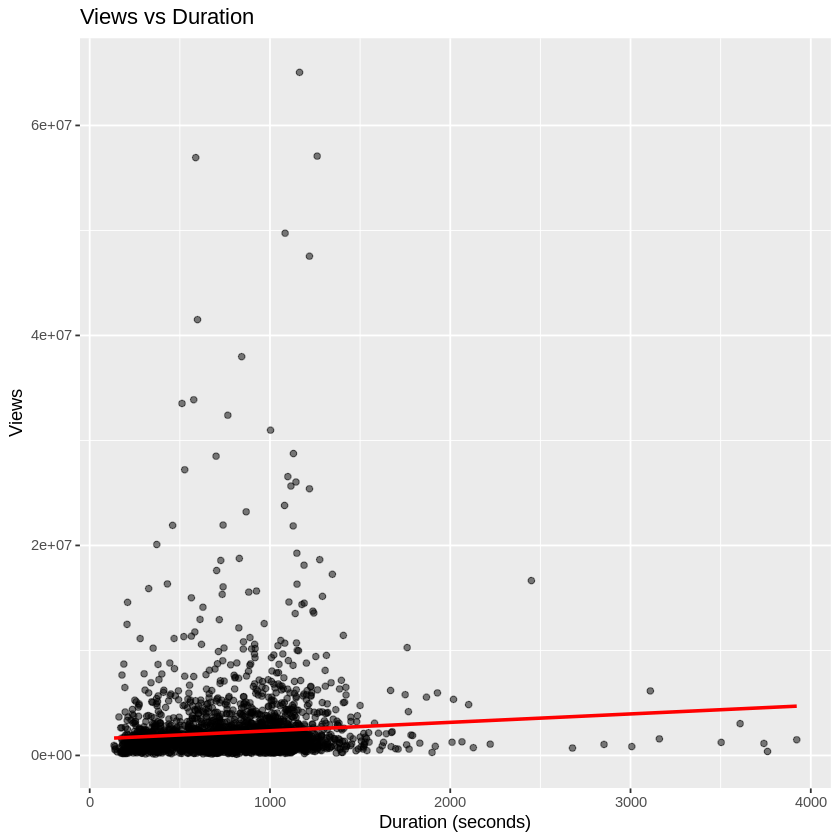

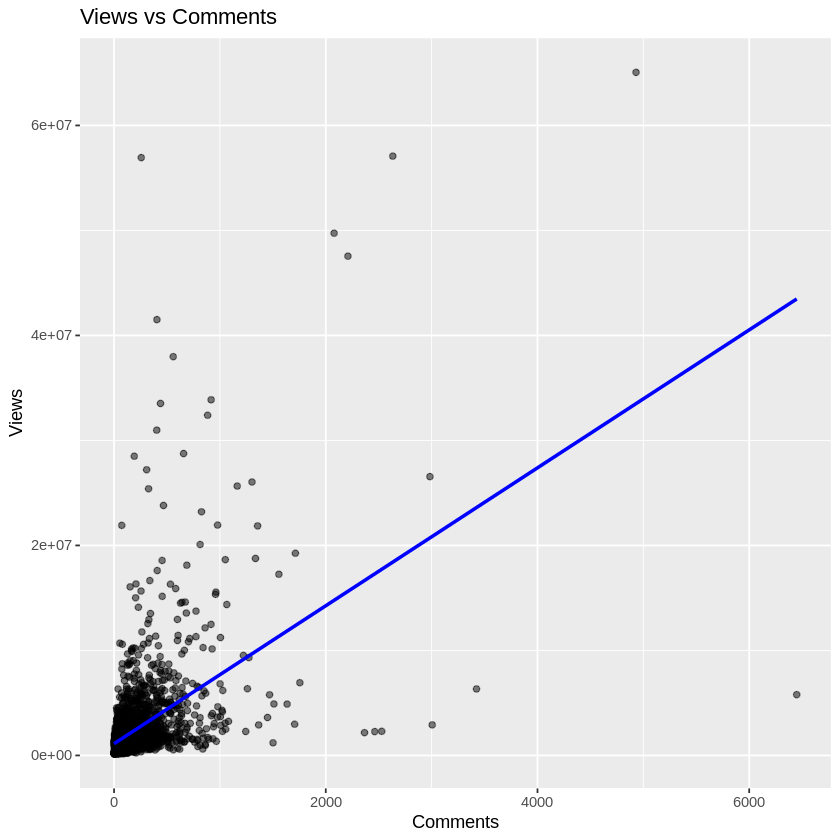

In [3]:
# Load necessary libraries
library(ggplot2)

# Load dataset
ted_talks <- read.csv("ted_talks.csv")

# Check structure of the dataset
str(ted_talks)

# Remove rows with missing values in comments
ted_talks_clean <- na.omit(ted_talks[, c("views", "comments", "duration")])

# Linear Regression: Predicting Views based on Duration and Comments
# Multiple Linear Regression: Views ~ Duration + Comments
lm_model <- lm(views ~ duration + comments, data = ted_talks_clean)

# Summary of the model
summary(lm_model)

# Scatter plot with regression line for Views vs Duration
ggplot(ted_talks_clean, aes(x = duration, y = views)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Views vs Duration", x = "Duration (seconds)", y = "Views")

# Scatter plot with regression line for Views vs Comments
ggplot(ted_talks_clean, aes(x = comments, y = views)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Views vs Comments", x = "Comments", y = "Views")


In [8]:
# Load necessary libraries
install.packages("Metrics")
library(Metrics)

# Load dataset
ted_talks <- read.csv("ted_talks.csv")

# Remove rows with missing values in comments and filter necessary columns
ted_talks_clean <- na.omit(ted_talks[, c("views", "comments", "duration")])

# Fit a multiple linear regression model: Views ~ Duration + Comments
lm_model <- lm(views ~ duration + comments, data = ted_talks_clean)

# Summary of the model (this includes R-squared value)
summary(lm_model)

# Calculate predictions
predicted_values <- predict(lm_model, ted_talks_clean)

# Calculate RMSE
rmse_value <- rmse(ted_talks_clean$views, predicted_values)
cat("RMSE: ", rmse_value, "\n")

# Calculate R-squared manually (though summary(lm_model) already gives R²)
ss_total <- sum((ted_talks_clean$views - mean(ted_talks_clean$views))^2)
ss_residual <- sum((ted_talks_clean$views - predicted_values)^2)
r_squared <- 1 - (ss_residual / ss_total)
cat("R-squared: ", r_squared, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = views ~ duration + comments, data = ted_talks_clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-37734722   -961918   -336762    299358  54097437 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1207394.6   134930.0   8.948   <2e-16 ***
duration       -113.1      157.9  -0.716    0.474    
comments       6592.3      199.3  33.078   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3053000 on 3347 degrees of freedom
Multiple R-squared:  0.2509,	Adjusted R-squared:  0.2504 
F-statistic: 560.4 on 2 and 3347 DF,  p-value: < 2.2e-16


RMSE:  3051227 
R-squared:  0.2508636 
